In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [4]:
all_site_daily_mean = daily_mean.mean(axis=1)

In [27]:
lwts = pd.read_csv('../Data/Weather/20CR_1871-1947_ncep_1948-2019_12hrs_UK.csv', parse_dates=[[0, 1, 2]], dayfirst=True)

In [28]:
lwts = lwts.rename(columns={'day_ month_ year': 'timestamp', ' LWT': 'LWT'})

In [29]:
lwts.index = pd.DatetimeIndex(lwts.timestamp)

In [30]:
lwts = lwts['LWT']

In [31]:
lwts

timestamp
1871-01-01    15
1871-01-02    25
1871-01-03    15
1871-01-04    25
1871-01-05    16
1871-01-06    16
1871-01-07    16
1871-01-08    27
1871-01-09    27
1871-01-10    20
1871-01-11    17
1871-01-12     0
1871-01-13    16
1871-01-14    15
1871-01-15    15
1871-01-16    15
1871-01-17    20
1871-01-18    20
1871-01-19    16
1871-01-20     0
1871-01-21    23
1871-01-22    20
1871-01-23    22
1871-01-24    12
1871-01-25    12
1871-01-26    13
1871-01-27     3
1871-01-28    13
1871-01-29    13
1871-01-30    13
              ..
2019-08-09    20
2019-08-10    20
2019-08-11    27
2019-08-12    16
2019-08-13    16
2019-08-14    25
2019-08-15    17
2019-08-16    15
2019-08-17    25
2019-08-18    26
2019-08-19    16
2019-08-20     6
2019-08-21    15
2019-08-22    15
2019-08-23    15
2019-08-24    14
2019-08-25     0
2019-08-26     5
2019-08-27    -1
2019-08-28    16
2019-08-29    15
2019-08-30    15
2019-08-31    20
2019-09-01     7
2019-09-02    16
2019-09-03    15
2019-09-04    27
2019

In [61]:
merged = pd.merge(all_site_daily_mean.rename('PM25'), lwts.rename('LWT'), left_index=True, right_index=True)

In [62]:
labels = {-1: 'U',
-9: 'non-existent day',
0: 'A',
20: 'C',
1: 'ANE',
11: 'NE',
21: 'CNE',
2: 'AE',
12: 'E',
22: 'CE',
3: 'ASE',
13: 'SE',
23: 'CSE',
4: 'AS',
14: 'S',
24: 'CS',
5: 'ASW',
15: 'SW',
25: 'CSW',
6: 'AW',
16: 'W',
26: 'CW',
7: 'ANW',
17: 'NW',
27: 'CNW',
8: 'AN',
18: 'N',
28: 'CN'}

In [63]:
merged['LWT'] = merged['LWT'].replace(labels)

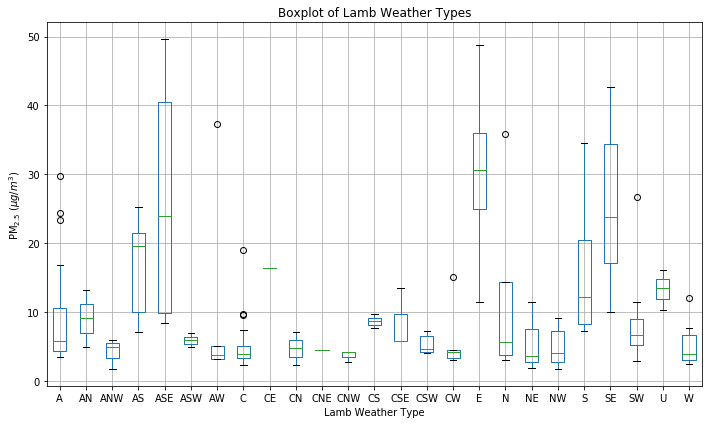

In [77]:
merged.boxplot(by='LWT', figsize=(10, 6))
#plt.title('Marathon day (5th May 2019) vs other Sundays in April/May')
plt.suptitle('')
plt.title('Boxplot of Lamb Weather Types')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Lamb Weather Type')
plt.tight_layout()
plt.savefig('graphs/BoxplotLWTs.png', dpi=300)

In [70]:
merged['Gross_LWT'] = merged.LWT.str.get(0)

In [71]:
def replace_func(x):
    if x == 'A':
        return 'Anticyclonic'
    elif x == 'C':
        return 'Cyclonic'
    else:
        return 'Neither'

In [74]:
merged['Gross_LWT'] = merged['Gross_LWT'].apply(replace_func)

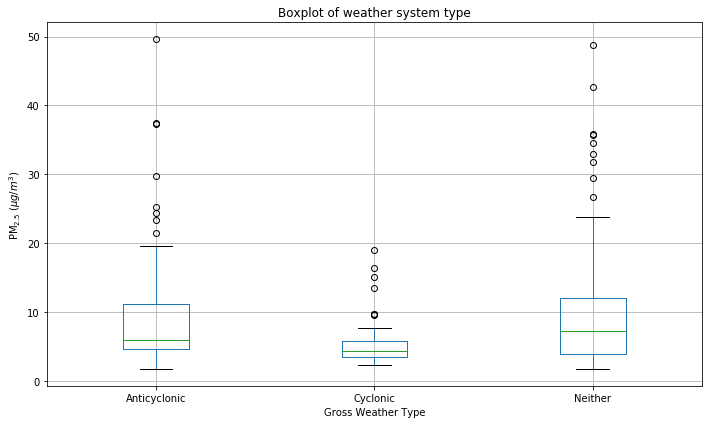

In [78]:
merged.boxplot(by='Gross_LWT', figsize=(10, 6))
#plt.title('Marathon day (5th May 2019) vs other Sundays in April/May')
plt.suptitle('')
plt.title('Boxplot of weather system type')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Gross Weather Type')
plt.tight_layout()
plt.savefig('graphs/BoxplotGrossLWTs.png', dpi=300)